# Description

It generates different general plots to compare coefficient values from Pearson, Spearman and Clustermatch, such as their distribution.

In `Settings` below, the data set and other options (such as tissue for GTEx) are specified.

# Modules

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns

from clustermatch.plots import plot_histogram, plot_cumulative_histogram, jointplot
from clustermatch import conf

# Settings

In [2]:
DATASET_CONFIG = conf.RECOUNT2
# GTEX_TISSUE = "whole_blood"
# GENE_SEL_STRATEGY = "var_pc_log2"

In [3]:
# this is used for the cumulative histogram
GENE_PAIRS_PERCENT = 0.70

# Paths

In [4]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None and conf.MANUSCRIPT["BASE_DIR"].exists()
), "Manuscript dir not set"

In [6]:
OUTPUT_FIGURE_DIR = conf.MANUSCRIPT["FIGURES_DIR"] / "coefs_comp" / f"recount2"
OUTPUT_FIGURE_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_FIGURE_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp/recount2')

In [7]:
INPUT_CORR_FILE_TEMPLATE = (
    DATASET_CONFIG["SIMILARITY_MATRICES_DIR"]
    / DATASET_CONFIG["SIMILARITY_MATRIX_FILENAME_TEMPLATE"]
)
display(INPUT_CORR_FILE_TEMPLATE)

PosixPath('/opt/data/results/recount2/similarity_matrices/recount_data_prep_PLIER-{corr_method}.pkl')

In [8]:
INPUT_FILE = DATASET_CONFIG["SIMILARITY_MATRICES_DIR"] / str(
    INPUT_CORR_FILE_TEMPLATE
).format(
    corr_method="all",
)
display(INPUT_FILE)

assert INPUT_FILE.exists()

PosixPath('/opt/data/results/recount2/similarity_matrices/recount_data_prep_PLIER-all.pkl')

# Data

In [9]:
df = pd.read_pickle(INPUT_FILE)

In [10]:
df.shape

(22777875, 3)

In [11]:
df.head()

clustermatch   pearson  spearman
A2M AATK         0.134712  0.032274  0.504520
    ABCA1        0.109580  0.110068  0.443315
    ABCA6        0.189934  0.050592  0.536541
    ABCC3        0.088957  0.053941  0.373502
    ABHD14A      0.082554  0.012871  0.367407

## Data stats

In [12]:
df.describe().applymap(str)

,clustermatch,pearson,spearman
count,22777875.0,22777875.0,22777875.0
mean,0.12239626306788322,0.04135289725923473,0.35560205629525
std,0.05517855239316797,0.05564905291748688,0.14485678763707768
min,-0.020708201398848845,3.4485718725107972e-09,1.4664539405018218e-07
25%,0.08594827602886085,0.008559453825595975,0.25751650369379536
50%,0.11655987591763352,0.022589133945572826,0.3624203366087556
75%,0.15002007321604555,0.05172293907981029,0.45802662986286513
max,0.7643432442902833,0.9969724273512506,0.9568969034971632


In [13]:
# skewness
df.apply(lambda x: stats.skew(x))

clustermatch    1.169131
pearson         3.566540
spearman       -0.127934
dtype: float64

# Histogram plot

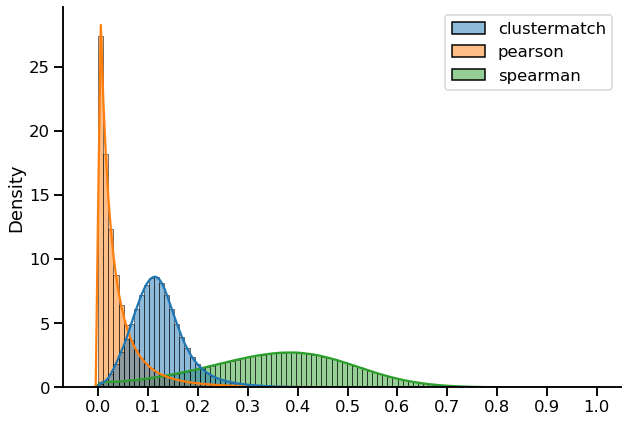

In [14]:
with sns.plotting_context("talk", font_scale=1.0):
    plot_histogram(df, output_dir=OUTPUT_FIGURE_DIR)

**UPDATE** Coefficients' values distribute very differently. Clustermatch is skewed to the left, whereas Pearson and specially Spearman seem more uniform.

# Cumulative histogram plot

I include also a cumulative histogram without specifying `bins`.

clustermatch    0.142005
pearson         0.043448
spearman        0.437460
Name: 0.7, dtype: float64

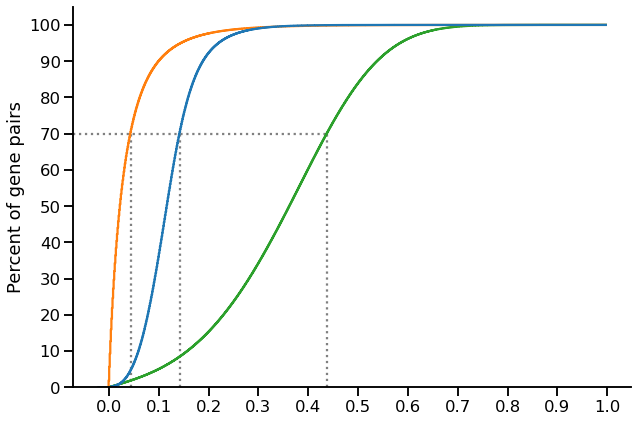

In [15]:
with sns.plotting_context("talk", font_scale=1.0):
    plot_cumulative_histogram(df, GENE_PAIRS_PERCENT, output_dir=OUTPUT_FIGURE_DIR)

# Joint plots comparing each coefficient

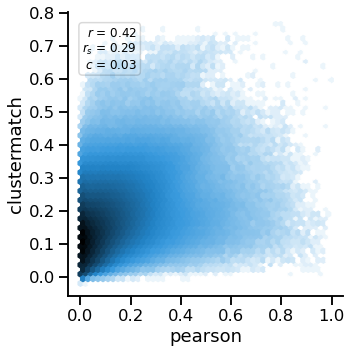

In [16]:
with sns.plotting_context("talk", font_scale=1.0):
    jointplot(
        data=df,
        x="pearson",
        y="clustermatch",
        output_dir=OUTPUT_FIGURE_DIR,
    )

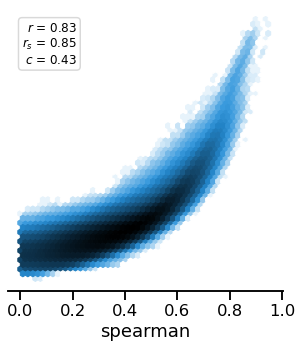

In [17]:
with sns.plotting_context("talk", font_scale=1.0):
    x, y = "spearman", "clustermatch"

    g = jointplot(
        data=df,
        x=x,
        y=y,
    )

    sns.despine(ax=g.ax_joint, left=True)
    g.ax_joint.set_yticks([])
    g.ax_joint.set_ylabel(None)

    g.savefig(
        OUTPUT_FIGURE_DIR / f"dist-{x}_vs_{y}.svg",
        bbox_inches="tight",
        dpi=300,
        facecolor="white",
    )

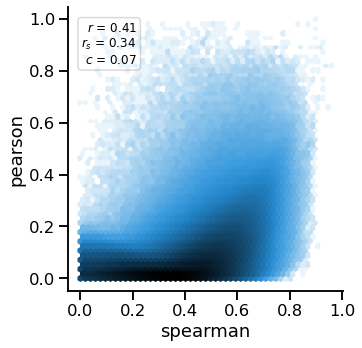

In [18]:
with sns.plotting_context("talk", font_scale=1.0):
    jointplot(
        data=df,
        x="spearman",
        y="pearson",
        output_dir=OUTPUT_FIGURE_DIR,
    )